# ECON 0150 | Replication Notebook

**Title:** GDP and Life Expectancy

**Original Authors:** Carragher, Widdop, Stuccio

**Original Date:** Fall 2025

---

This notebook replicates the analysis from a student final project in ECON 0150: Economic Data Analysis.

## About This Replication

**Research Question:** Is there a relationship between GDP per Capita and Life Expectancy?

**Data Source:** World Bank GDP per capita and life expectancy data (2023)

**Methods:** OLS regression with log transformation

**Main Finding:** GDP per capita is positively associated with life expectancy. Each additional dollar of GDP is associated with 0.0002 years higher life expectancy (p < 0.001).

**Course Concepts Used:**
- OLS regression
- Merging datasets
- Log transformations
- Data cleaning

---
## Step 0 | Setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Load data from course website
file_path = 'https://tayweid.github.io/econ-0150/projects/replications/0003/data/'

gdp = pd.read_csv(file_path + 'gdp-per-capita-worldbank.csv')
life = pd.read_csv(file_path + 'life-expectancy.csv')

print(f"GDP data: {len(gdp)} rows")
print(f"Life expectancy data: {len(life)} rows")

GDP data: 7311 rows
Life expectancy data: 21565 rows


---
## Step 1 | Data Preparation

In [5]:
# Filter to 2023 and rename columns
life_2023 = life[life['Year'] == 2023].copy()
gdp_2023 = gdp[gdp['Year'] == 2023].dropna().copy()

# Rename columns for easier use
gdp_2023 = gdp_2023.rename(columns={
    'Entity': 'Country',
    'GDP per capita, PPP (constant 2021 international $)': 'GDP_per_capita',
    'World regions according to OWID': 'Region'
})
life_2023 = life_2023.rename(columns={
    'Entity': 'Country',
    'Period life expectancy at birth': 'LifeExpectancy'
})

# Find common countries
common_countries = set(life_2023['Country']).intersection(set(gdp_2023['Country']))
print(f"Countries in both datasets: {len(common_countries)}")

Countries in both datasets: 197


In [6]:
# Filter and merge
life_2023 = life_2023[life_2023['Country'].isin(common_countries)]
gdp_2023 = gdp_2023[gdp_2023['Country'].isin(common_countries)]

data = pd.merge(life_2023, gdp_2023, on=['Country', 'Year', 'Code'], how='inner')

# Create log GDP
data['log_GDP'] = np.log(data['GDP_per_capita'])

print(f"Merged data: {len(data)} countries")
data.head()

Merged data: 197 countries


,Country,Code,Year,LifeExpectancy,GDP_per_capita,Region,log_GDP
0,Afghanistan,AFG,2023,66.0346,1983.8126,Asia,7.592776
1,Albania,ALB,2023,79.6019,17991.0160,Europe,9.797628
2,Algeria,DZA,2023,76.2610,15159.3240,Africa,9.626371
3,Andorra,AND,2023,84.0406,64631.2970,Europe,11.076454
4,Angola,AGO,2023,64.6170,7250.4030,Africa,8.888812


---
## Step 2 | Data Exploration

In [7]:
# Summary statistics
data[['GDP_per_capita', 'LifeExpectancy']].describe()

,GDP_per_capita,LifeExpectancy
count,197.000000,197.000000
mean,26848.969745,73.392291
std,26677.580912,7.044876
min,828.582950,54.462300
25%,6340.608000,67.689400
50%,17128.697000,74.402100
75%,40516.810000,78.632900
max,129555.240000,85.510600


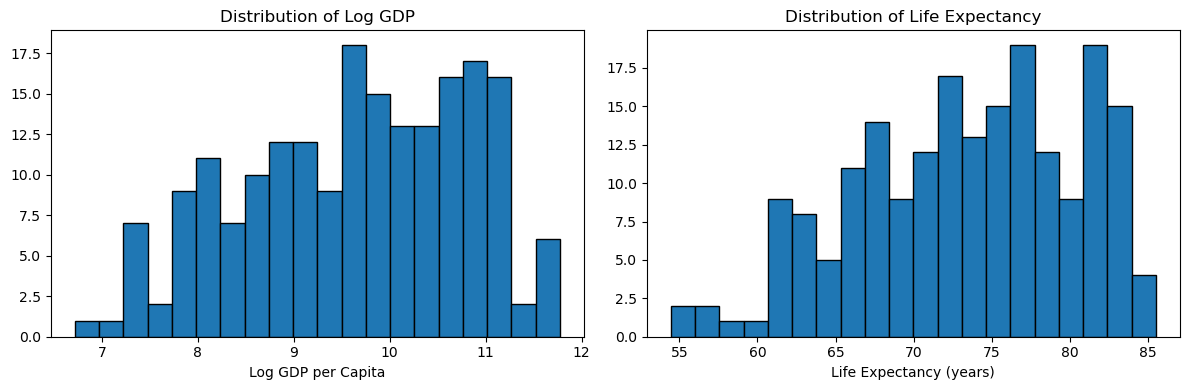

In [8]:
# Distribution plots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(data['log_GDP'], bins=20, edgecolor='black')
axes[0].set_xlabel('Log GDP per Capita')
axes[0].set_title('Distribution of Log GDP')

axes[1].hist(data['LifeExpectancy'], bins=20, edgecolor='black')
axes[1].set_xlabel('Life Expectancy (years)')
axes[1].set_title('Distribution of Life Expectancy')

plt.tight_layout()
plt.show()

---
## Step 3 | Visualization

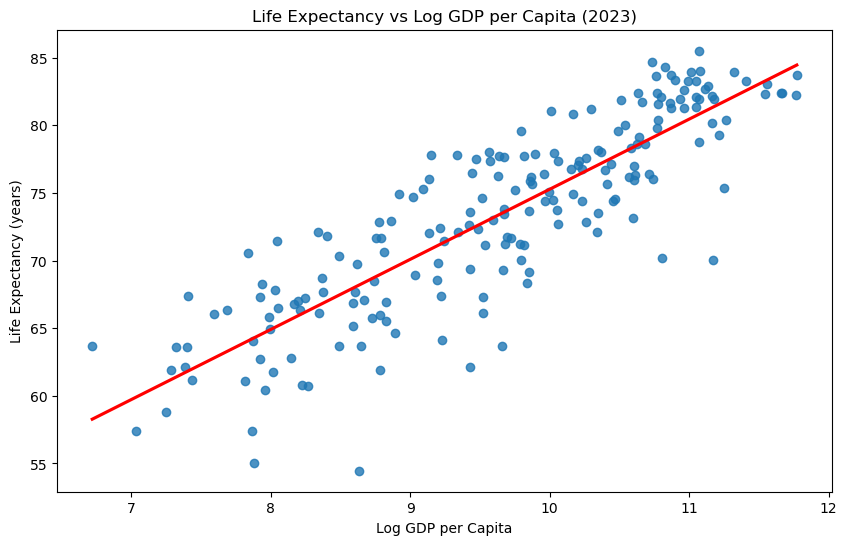

In [9]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='log_GDP', y='LifeExpectancy', data=data, ci=None, line_kws={'color': 'red'})
plt.xlabel('Log GDP per Capita')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy vs Log GDP per Capita (2023)')
plt.show()

---
## Step 4 | Statistical Analysis

In [10]:
# Model with raw GDP
model_raw = smf.ols('LifeExpectancy ~ GDP_per_capita', data=data).fit()
print("Model with GDP (raw):")
print(model_raw.summary().tables[1])

Model with GDP (raw):
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         68.1353      0.480    142.045      0.000      67.189      69.081
GDP_per_capita     0.0002   1.27e-05     15.430      0.000       0.000       0.000


In [11]:
# Model with log GDP
model_log = smf.ols('LifeExpectancy ~ log_GDP', data=data).fit()
print("\nModel with log GDP:")
print(model_log.summary().tables[1])
print(f"\nR-squared: {model_log.rsquared:.3f}")


Model with log GDP:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.4494      2.158     10.867      0.000      19.194      27.705
log_GDP        5.1821      0.222     23.312      0.000       4.744       5.621

R-squared: 0.736


---
## Step 5 | Results Interpretation

### Key Findings

**Model with raw GDP:**
- Coefficient: 0.0002 (p < 0.001)
- Each $1,000 increase in GDP is associated with ~0.2 years higher life expectancy

**Model with log GDP:**
- Log GDP is a strong predictor of life expectancy
- The log transformation better captures the diminishing returns of wealth on health

### Interpretation

There is a strong positive relationship between economic development and life expectancy. This relationship is likely driven by:
- Better healthcare infrastructure
- Improved nutrition and sanitation
- Lower infant mortality
- Access to education

The relationship shows diminishing returns - going from $5,000 to $10,000 GDP has a larger effect than going from $50,000 to $55,000.

---
## Replication Exercises

### Exercise 1: Regional Comparison
Add region as a control variable. Does the GDP-life expectancy relationship hold within regions?

### Exercise 2: Historical Comparison
Repeat the analysis for 2000 instead of 2023. Has the relationship changed over time?

### Exercise 3: Outliers
Identify countries that have unusually high or low life expectancy given their GDP. What might explain these cases?

### Challenge Exercise
The relationship could run in both directions (healthier populations produce more). How would you test the direction of causality?

In [ ]:
# Your code for exercises
